In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate LIF with dendritic spikes

This notebook reproduces Figure 2b-d. I did not fix a random seed for Figure 2d, so the exact dynamics will vary.

In [2]:
def LIF_dspikes(mu, sigma, dspike_mem, dspike_rate, dspike_length, nb_steps):
    
    
    
    
    dt = 1e-3
    u = np.zeros(nb_steps)
    ud = np.zeros(nb_steps)
    spk = np.zeros(nb_steps)
    u_thresh = 1
    tau_m = 10*dt
    
    y = np.random.randn(nb_steps)
    I = mu*np.ones(nb_steps)
    t = np.zeros(nb_steps)
    d = np.zeros(nb_steps)
    count = 0
    dspike_on = False
    for i in range(nb_steps-1):
            
        if u[i] + ud[i]>=u_thresh:
                spk[i] = 1
                u[i+1] = 0
                
        else:
            u[i+1] = u[i] + ((-u[i] + I[i])/tau_m)*dt + sigma*np.sqrt(dt)*y[i]
        
        # prob of observing a poisson spike
        p = dspike_rate*dt
        rnd = np.random.rand()
    
        if dspike_on == True: 
            d[i] = 1
            count += 1
            ud[i+1] = dspike_mem
            
        if rnd<p:
            dspike_on = True
            count = 0
            
        if count >= dspike_length: 
            dspike_on = False
            
        t[i] = i*dt   
        
    return u, ud, spk, t, I, d

In [20]:
mu_vec = np.linspace(0.5, 1.25, 50)
dspike_mem_vec = np.array([0.3])
sigma = 1

rate_vec = np.zeros((len(mu_vec), len(dspike_mem_vec)))
cv_vec = np.zeros((len(mu_vec), len(dspike_mem_vec)))

for i, dspike_mem in enumerate(dspike_mem_vec):
    for j, mu in enumerate(mu_vec):
        u, ud, spks, t, I, d = LIF_dspikes(mu=mu, sigma=1, dspike_mem=dspike_mem, dspike_rate=2, dspike_length=50, nb_steps=int(10e7))
        isi = np.diff(t[spks==1])

        rate_vec[j, i] = 1/np.mean(isi)
        cv_vec[j, i] = np.std(isi)/np.mean(isi)

1.788562138776018


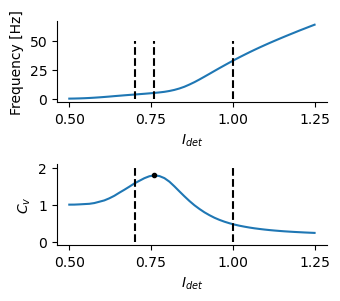

In [26]:
plt.figure(figsize=(3.5, 3))

alphas = np.linspace(1, 0.4, len(dspike_mem_vec))
plt.subplot(2,1,1)
for i, dspike_mem in enumerate(dspike_mem_vec):
    if dspike_mem == 0.3 or dspike_mem==0:
        plt.plot(mu_vec, rate_vec[:, i], label='$D=$'+f'{dspike_mem}', color='tab:blue')
        plt.vlines(mu_vec[np.where(cv_vec[:,i]==np.nanmax(cv_vec[:,i]))[0]], 0, 50, linestyle='--', color='k')
    
sns.despine()
plt.xlabel('$I_{det}$')
plt.ylabel('Frequency [Hz]')
plt.yticks([0, 25, 50])
plt.xticks([0.5, 0.75, 1, 1.25])

plt.vlines(1, 0, 50, linestyle='--', color='k')
plt.vlines(0.7, 0, 50, linestyle='--', color='k')
    
plt.subplot(2,1,2)
for i, dspike_mem in enumerate(dspike_mem_vec):
    if dspike_mem == 0.3:
        plt.plot(mu_vec, cv_vec[:, i], color='tab:blue')
    
    #plt.vlines(1-dspike_mem, 0, 1.5, color='tab:blue', alpha=alphas[i])
        print(np.nanmax(cv_vec[:,i]))
        plt.plot(mu_vec[np.where(cv_vec[:,i]==np.nanmax(cv_vec[:,i]))[0]], np.nanmax(cv_vec[:,i]), '.', color='k')
        
        
        plt.vlines(1, 0, 2, linestyle='--', color='k')
        plt.vlines(0.7, 0, 2, linestyle='--', color='k')
        
    
plt.xticks([0.5, 0.75, 1, 1.25])
plt.yticks([0, 1, 2])

plt.xlabel('$I_{det}$')
plt.ylabel('$C_{v}$')
sns.despine()
plt.tight_layout()
plt.savefig('../results/LIF_dspike_amp.svg')

In [4]:
mu_vec = np.linspace(0.5, 1.1, 50)
dspike_mem_vec = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])


rate_vec = np.zeros((len(mu_vec), len(dspike_mem_vec)))
cv_vec = np.zeros((len(mu_vec), len(dspike_mem_vec)))

for i, dspike_mem in enumerate(dspike_mem_vec):
    for j, mu in enumerate(mu_vec):
        u, ud, spks, t, I, d = LIF_dspikes(mu=mu, sigma=1, dspike_mem=dspike_mem, dspike_rate=2, dspike_length=50, nb_steps=int(10e6))
        isi = np.diff(t[spks==1])

        rate_vec[j, i] = 1/np.mean(isi)
        cv_vec[j, i] = np.std(isi)/np.mean(isi)

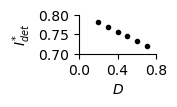

In [18]:
plt.figure(figsize=(1, 0.5))

for i, dspike_mem in enumerate(dspike_mem_vec[1:]):
    
        #plt.plot(mu_vec[np.where(cv_vec[30:,i]==np.nanmax(cv_vec[30:,i]))[0]], np.nanmax(cv_vec[30:,i]) , '.', color='k')
    plt.plot(dspike_mem, mu_vec[np.where(cv_vec[:,i+1]==np.nanmax(cv_vec[:,i+1]))[0]], '.', color='k')
        
sns.despine()

plt.ylabel('Peak $C_{v}$')
plt.ylabel('$I_{det}^{*}$')
plt.xlabel('$D$')
plt.xticks([0, 0.4, 0.8])
plt.yticks([0.7, 0.75, 0.8])
plt.savefig('../results/LIF_dspike_amp_cv_peak.svg')

C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_28656\3668576523.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


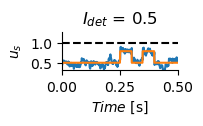

In [214]:
u_noisy, ud_noisy, spks_noisy, t, I, d_noisy = LIF_dspikes(mu=0.5, sigma=1, dspike_mem=0.3, dspike_rate=5, dspike_length=50, nb_steps=int(10e5))

plt.figure(figsize=(1.5, 0.5))

plt.plot(t[100:600]-0.1, u_noisy[100:600] + ud_noisy[100:600])
plt.plot(t[100:600]-0.1, 0.5*np.ones(500) + d_noisy[100:600]*0.3)
t2 = t[100:600]-0.1

for t_tmp in t2[spks_noisy[100:600]==1]:
    plt.vlines(t_tmp, 0, 2)
    
plt.plot(t[100:600]-0.1, np.ones(500), color='k', linestyle='--')

sns.despine()
plt.xticks([0, 0.25, 0.5])
plt.xlabel('Time [s]')
plt.yticks([0, 0.5, 1])
plt.xlim([0, .5])
plt.ylim([.3, 1.3])
plt.ylabel('$u_{s}$')

plt.title('$I_{det}$ = 0.5')
plt.tight_layout()

plt.savefig('../results/LIF_low.svg')

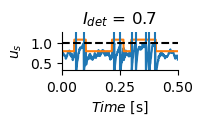

In [218]:
u_noisy, ud_noisy, spks_noisy, t, I, d_noisy = LIF_dspikes(mu=0.7, sigma=1, dspike_mem=0.3, dspike_rate=5, dspike_length=50, nb_steps=int(10e5))

plt.figure(figsize=(1.5, 0.5))

plt.plot(t[100:600]-0.1, u_noisy[100:600] + ud_noisy[100:600])
plt.plot(t[100:600]-0.1, 0.8*np.ones(500) + d_noisy[100:600]*0.3)
t2 = t[100:600]-0.1

for t_tmp in t2[spks_noisy[100:600]==1]:
    plt.vlines(t_tmp, 0, 2)
    
plt.plot(t[100:600]-0.1, np.ones(500), color='k', linestyle='--')

sns.despine()
plt.xticks([0, 0.25, 0.5])
plt.xlabel('Time [s]')
plt.yticks([0, 0.5, 1])
plt.xlim([0, .5])
plt.ylim([.3, 1.3])
plt.ylabel('$u_{s}$')

plt.title('$I_{det}$ = 0.7')

plt.savefig('../results/LIF_middle.svg')

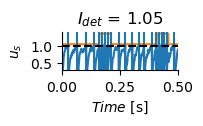

In [226]:
u_noisy, ud_noisy, spks_noisy, t, I, d_noisy = LIF_dspikes(mu=1.05, sigma=1, dspike_mem=0.3, dspike_rate=5, dspike_length=50, nb_steps=int(10e5))

plt.figure(figsize=(1.5, 0.5))

plt.plot(t[100:600]-0.1, u_noisy[100:600] + ud_noisy[100:600])
plt.plot(t[100:600]-0.1, 1.05*np.ones(500) + d_noisy[100:600]*0.3)
t2 = t[100:600]-0.1

for t_tmp in t2[spks_noisy[100:600]==1]:
    plt.vlines(t_tmp, 0, 2)
    
plt.plot(t[100:600]-0.1, np.ones(500), color='k', linestyle='--')

sns.despine()
plt.xticks([0, 0.25, 0.5])
plt.xlabel('$Time$ [s]')
plt.yticks([0, 0.5, 1])
plt.xlim([0, .5])
plt.ylim([.3, 1.4])
plt.ylabel('$u_{s}$')

plt.title('$I_{det}$ = 1.05')

plt.savefig('../results/LIF_upper.svg')